In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
import matplotlib.cm as cm
import copy
import tempfile
import os

# Clustering K-means

In [2]:
from sklearn.datasets.samples_generator import make_blobs


centers = [[1, 1], [1, -1], [-1, -1], [-1, 1]]
X, y = make_blobs(n_samples=1000, centers=centers, 
                  cluster_std=0.5, random_state=101)

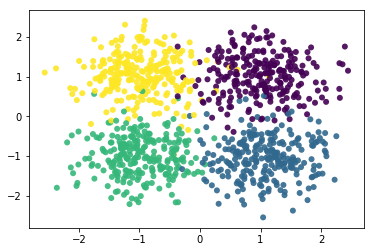

In [3]:
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='none', alpha=0.9)
plt.show()


**Estrategia**:

1. Elegír *K* centros de cluster al azar
2. Agrupar los puntos con su centro mas cercano
3. Tomar la posición promedio de cada cluster como el nuevo centro.
4. Si algun punto cambio de cluster en 2, volver a 2.

### Ejecutamos K-means e inspeccionamos lo que está pasando en cada iteración.

### La elección inicial de los centroides es al azar, es decir, se eligen cuatro puntos de entrenamiento en la primera iteración durante la fase de expectativa del entrenamiento.

### Ejecutamos 4 iteraciones y obtenemos para cada una así el centroide, la distorsión y los límites de decisión (también llamado Voronoi cluster).

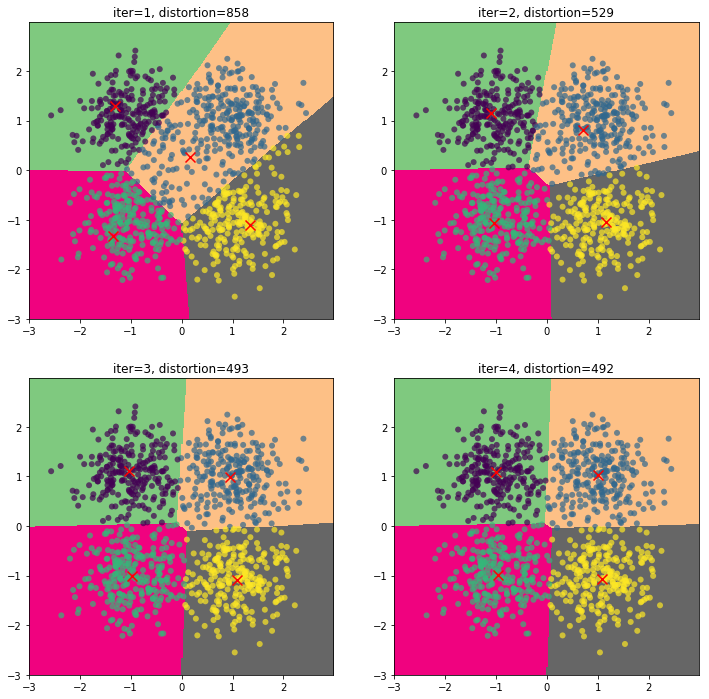

In [4]:
pylab.rcParams['figure.figsize'] = (12.0, 12.0)

from sklearn.cluster import KMeans

for n_iter in range(1, 5):

    cls = KMeans(n_clusters=4, max_iter=n_iter, n_init=1,
                 init='random', random_state=101)
    cls.fit(X)
    
    
    # Plot the voronoi cells
    
    plt.subplot(2, 2, n_iter)
    h=0.02
    xx, yy = np.meshgrid(np.arange(-3, 3, h), np.arange(-3, 3, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.imshow(Z, interpolation='nearest', cmap=plt.cm.Accent,
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               aspect='auto', origin='lower')

    
    plt.scatter(X[:,0], X[:,1], c=cls.labels_, edgecolors='none', alpha=0.7)
    plt.scatter(cls.cluster_centers_[:,0], cls.cluster_centers_[:,1], 
                marker='x', color='r', s=100, linewidths=4)
    plt.title("iter=%s, distortion=%s" %(n_iter, int(cls.inertia_)))

plt.show()

#### Como puede ver, la distorsión es cada vez menor a medida que aumenta el número de iteraciones. Para este conjunto de datos ficticio, parece que usando unas pocas iteraciones (cinco iteraciones), hemos llegado a la convergencia.

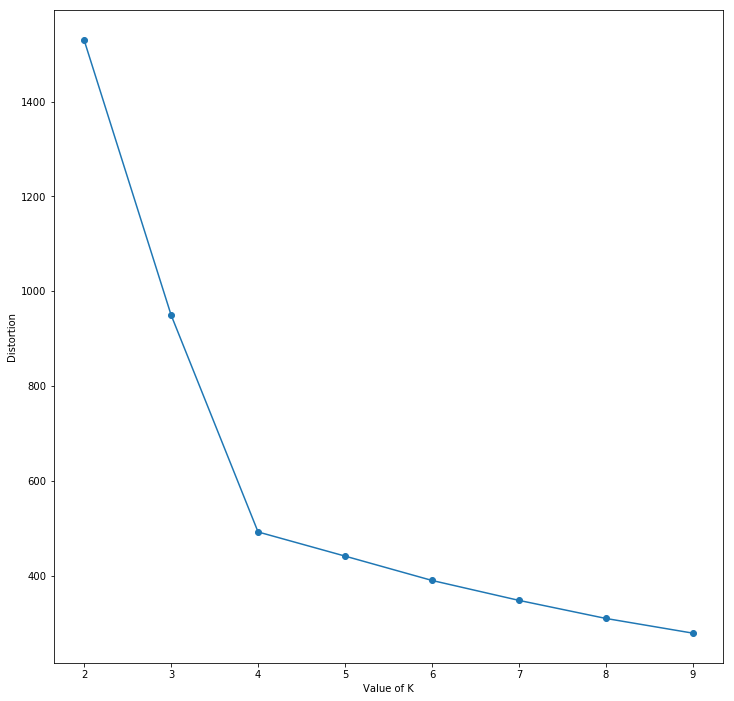

In [5]:
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters=K, random_state=101)
    cls.fit(X)
    Ds.append(cls.inertia_)

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Value of K")
plt.ylabel("Distortion")
plt.show()

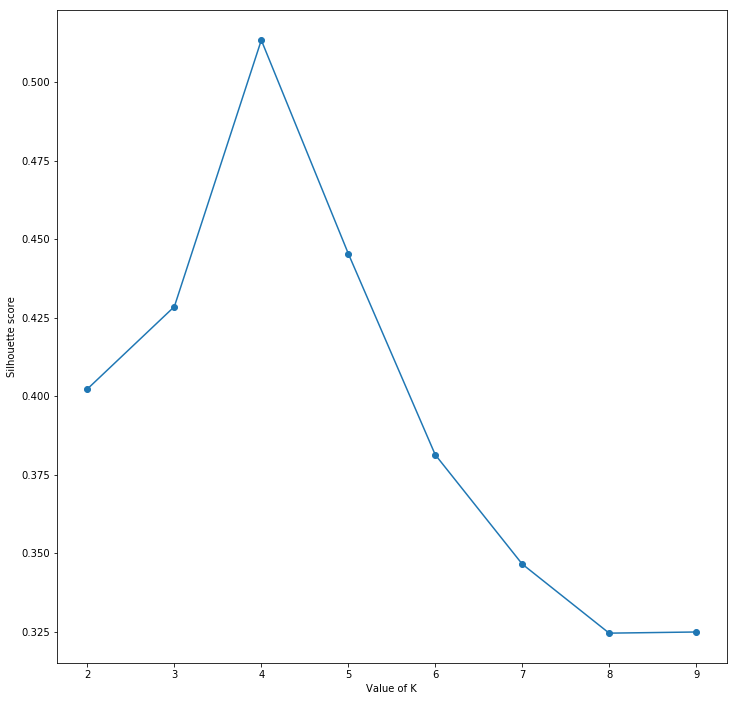

In [6]:
from sklearn.metrics import silhouette_score

Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters=K, random_state=101)
    Ds.append(silhouette_score(X, cls.fit_predict(X)))

plt.plot(Ks, Ds, 'o-')
plt.xlabel("Value of K")
plt.ylabel("Silhouette score")
plt.show()

In [7]:
def plot_clustering(x, y, title, mx=None, ymax=None, xmin=None, km=None):
    pylab.figure(num=None, figsize=(8, 6))
    if km:
        pylab.scatter(x, y, s=50, c=km.predict(list(zip(x, y))))
    else:
        pylab.scatter(x, y, s=50)

    pylab.title(title)
    pylab.xlabel("Occurrence word 1")
    pylab.ylabel("Occurrence word 2")

    pylab.autoscale(tight=True)
    pylab.ylim(ymin=0, ymax=1)
    pylab.xlim(xmin=0, xmax=1)
    pylab.grid(True, linestyle='-', color='0.75')

    return pylab

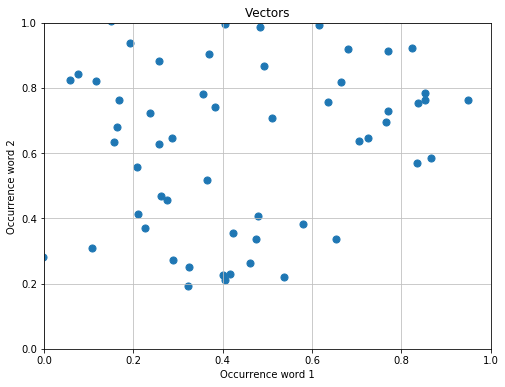

In [10]:
import os
import scipy as sp
from scipy.stats import norm
from matplotlib import pylab
from sklearn.cluster import KMeans

xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

i = 1
plot_clustering(x, y, "Vectors")
pylab.show()

In [14]:
num_clusters = 3
seed = 2
sp.random.seed(seed)

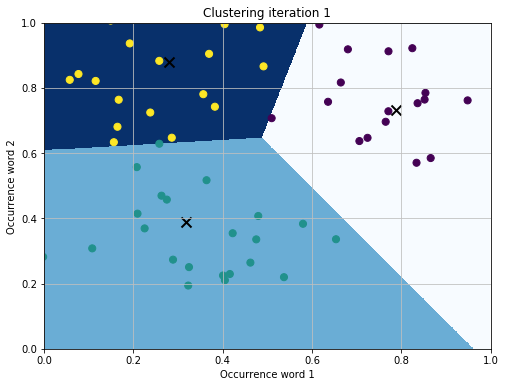

In [15]:
# 1 iteration ####################

mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

km = KMeans(init='random', n_clusters=num_clusters,
            n_init=1, max_iter=1,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 1", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c1a, c1b, c1c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')
pylab.show()

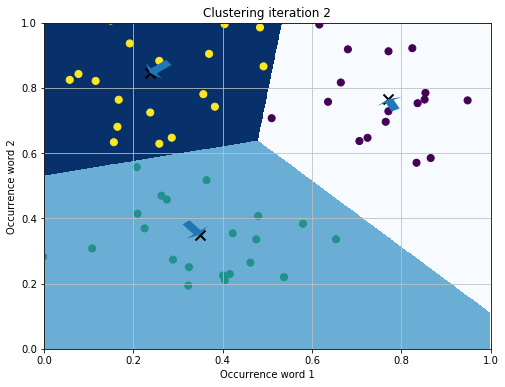

In [16]:
# 2 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters,
            n_init=1, max_iter=2,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 2", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

c2a, c2b, c2c = km.cluster_centers_
pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.gca().add_patch(
    pylab.Arrow(c1a[0], c1a[1], c2a[0] - c1a[0], c2a[1] - c1a[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1b[0], c1b[1], c2b[0] - c1b[0], c2b[1] - c1b[1], width=0.1))
pylab.gca().add_patch(
    pylab.Arrow(c1c[0], c1c[1], c2c[0] - c1c[0], c2c[1] - c1c[1], width=0.1))

pylab.show()

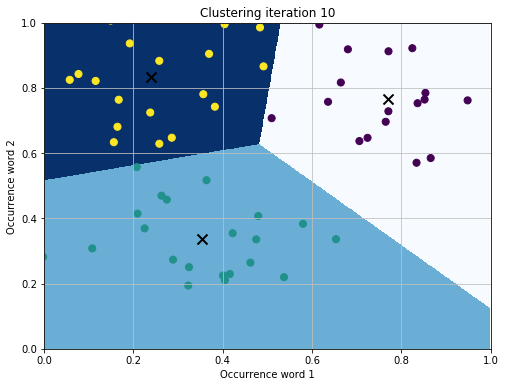

In [19]:
# 3 iterations ####################
km = KMeans(init='random', n_clusters=num_clusters,
            n_init=1, max_iter=10,
            random_state=seed)
km.fit(sp.array(list(zip(x, y))))

Z = km.predict(sp.c_[mx.ravel(), my.ravel()]).reshape(mx.shape)

plot_clustering(x, y, "Clustering iteration 10", km=km)
pylab.imshow(Z, interpolation='nearest',
             extent=(mx.min(), mx.max(), my.min(), my.max()),
             cmap=pylab.cm.Blues,
             aspect='auto', origin='lower')

pylab.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
              marker='x', linewidth=2, s=100, color='black')

pylab.show()